Matthew Dees, Programming Assignment 1, Algorithms 605.621

# I have neither given nor received unauthorized aid on this graded academic work

# Overview

Construct an efficient algorithm to return the m closest pair of points in a Euclidean two-dimensional plane.

This assignment requires you to "construct an algorithm." There are  many algorithms solving this problem, but we want you to find an efficient one.  For instance, the textbook section 33.4 describes an algorithm that you may use. You must:

1. Complete the assignment
1. Describe an algorithm in correct pseudocode notation
1. Implement the algorithm correctly
1. Analyze and discuss performance and potential improvements

This programming problem is not a collaborative assignment. You are required to follow the Programming
Assignment Guidelines and Pseudocode Restrictions (Blackboard page Syllabus & Course Information ) when
preparing your solutions to these problems.

This assignment requires you to “construct an algorithm.” There are, of course, many algorithms solving this
problem. Some algorithms are asymptotically more efficient than others. Your objectives are to (a) complete the
assignment, and (b) submit an asymptotically efficient algorithm.

# Closest Pairs (90 pts total)

## Algorithm
 Construct an algorithm for finding the $m \leq {n \choose 2}$         closest pairs of points in $P$. Your algorithm inputs are $P$ and $m$. 
Return the distances between the $m$ closest pairs of points, including their $x$ and $y$ coordinates.  This involves writing pseudocode, then explaining the operation of the pseudocode in plain language.

### Pseudocode (15 pts)
Modify the pseudocode below to define your algorithm.  Remember, you MUST use an efficient algorithm, such as one presented in the book. Note that keywords are bolded, blocks are indented, and proper mathematical operators are used.  Refer to your textbook, chapter 2, pg. 16-22, for more details on pseudocode conventions.  Note that every named object (functions, methods, variables, data structures, etc.) used in your pseudocode must be defined clearly.  

<!--- This is a Markdown comment. -->
<!--- Separate the $...$ in many cases to get Latex to render properly.
      In output LaTeX, use incorrectly closed <span hidden> to pass in LaTeX options. -->
1. **function** closestDistance(P, m):  <span hidden>\setlength\itemsep{0.0em}</div>
1. $~~~~$ P $\gets$ sort(P) on x-value
1. $~~~~$ **return** calcClosest(P)
1. **function** calcClosest(P):  <span hidden>\setlength\itemsep{0.0em}</div>
1. $~~~~$ length $\gets$ P/2
1. $~~~~$ **if** length == 0
1. $~~~~$$~~~~$ **print** empty input
1. $~~~~$ **if** length == 1
1. $~~~~$$~~~~$ **print** invalid input
1. $~~~~$ **if** P $\le$ 3 **bruteforce()**
1. $~~~~$ **else** P $\gt$ 3 **do**
1. $~~~~$$~~~~$ mid $\gets$ len(P)/2
1. $~~~~$$~~~~$ P_l $\gets$ :mid
1. $~~~~$$~~~~$ P_r $\gets$ mid:
1. $~~~~$$~~~~$ result_l $\gets$ **calcClosest**(P_l)
1. $~~~~$$~~~~$ result_r $\gets$ **calcClosest**(P_r)
1. $~~~~$$~~~~$ min_l $\gets$ **min**(result_l)
1. $~~~~$$~~~~$ min_r $\gets$ **min**(result_r)
1. $~~~~$$~~~~$ **if** min_r $\lt$ min_l
1. $~~~~$$~~~~$$~~~~$ final $\gets$ min_r
1. $~~~~$$~~~~$ **else** final $\gets$ min_l
1. $~~~~$$~~~~$ Y_array $\gets$ 0
1. $~~~~$$~~~~$ **for** i in P
1. $~~~~$$~~~~$$~~~~$ **if** X[dist] - best_dist $\le$ X[i] $\le$ X[dist] + best_dist
1. $~~~~$$~~~~$$~~~~$$~~~~$ Y_array $\gets$ X[i]
1. $~~~~$$~~~~$$~~~~$ result_split $\gets$ **bruteforce**(Y_array)
1. $~~~~$$~~~~$ result $\gets$ (result_l + result_r + result_split)
1. $~~~~$ **return** result
1. **function** closestDistance(P, m):  <span hidden>\setlength\itemsep{0.0em}</div>
1. $~~~~$ **for** i in P
1. $~~~~$$~~~~$ **for** j+1 in P
1. $~~~~$$~~~~$$~~~~$ dist $\gets$ sqrt((x1 - x2)^2 + (y1 - y2)^2)
1. $~~~~$$~~~~$$~~~~$ results $\gets$ (P1, P2, dist)
1. $~~~~$ **return** results


### Simple Talk-Through of My Algorithm (10 pts)
Explain how your algorithm works in plain language.  All steps in the pseudocode (above) must be explained, and both the pseudocode and this text explanation must match the Python code implementation.  Remember to include citations for any and all help that you received.

**The algorithm takes as input a set of points, POINTS, and an integer M as the number of closest neighbors the algorithm will produce. If POINTS <= 3, the algorithm will simply perform brute force comparison to return M number of neighbors. If POINTS > 3, the algorithm will divide and conquer recursively, taking the midpoint as the length of POINTS/2 and splitting the data set into two data sets, P_l and P_r, where P_l contains points at or to the left of the midpoint and P_r contains points at or to the right of the midpoint. Then, the divide and conquer step begins, as 2 calls are made to the brute force function with inputs of P_l and P_r, the results of each is inserted into its own data set. The minimum distance between both of these data sets is found. Then, the algorithm will check the distance of cases where one point may lie on the left side of the midpoint and the other on the right. These 3 results are combined into a single, final data set, and sorted. Then, the results of this data set are returned based on the input M, for the M closest points in the data set.** 

### Runnning Time Analysis (15 pts)
Determine the worst-case running time (page 25) of your algorithm 
		             (call this the algorithm's worst-case running time).

The worst-case running time of my algorithm is $O(2(n * log(n)))$ due to 2 separate calls to Python's sort function. 

## Implementation (30 pts)
Implement your algorithm. Your code must have a reasonable, consistent, style and documentation. It must have appropriate data structures, modularity, and error checking.

In [1]:
###################################################
#  INSTRUCTOR INPUT BLOCK
#  THIS CELL WILL BE REPLACED BY GRADER INPUTS
#  DO NOT CHANGE THE NAMES OR SIGNATURES OF THESE VARIABLES
#  SAMPLE DATA AND OUTPUTS ARE GIVEN AT THE END OF THIS ASSIGNMENT
###################################################

POINTS = [(6, 6), (4, 7), (17, 3), (6, 18), (2, 13), (12, 5), (5, 10), (18, 16), (2, 20), (13, 1)]

M = 5 #Number of closest points to return

# Each point is a tuple (x,y)
# POINTS is a list of all points (i.e. a list of tuples)
# The data we're expecting as a result is also list of tuples with three elements:
#    point #1, point #2, and the distance between them:  ( (x1,y1),(x2,y2),distance) )
# These are then stacked into a list with up to M entries in it:  M_closest = [(tuple1), (tuple2), ... (tupleM)]

In [2]:
# import numpy for square root
import numpy as np

# call counter for calculating function calls
def callcounter(func):
    def wrapper(*args, **kwargs): # fancy stuff to handle any/all arguments that func may have
        wrapper.count += 1
        result = func(*args, **kwargs)
        return result
    wrapper.count = 0 # like a global variable for the unique function wrapper
    return wrapper

# main function
def closestDistance(POINTS, m):
    # pre-sort the points by x-values
    POINTS = sorted(POINTS, key = lambda x: x[0]) # sorts N points
    return calcClosest(POINTS)

# recursive calculation function
def calcClosest(X):
    length = len(X)
    # error handling
    if length == 0:
        print('Empty input.')
        return
    if length == 1:
        print('Please input at least 2 points.')
        return
    # if length of points is less than/equal to 3, simply brute force it
    if length <= 3:
        return CDbruteforce(X)
    else:
        # pre-sort - X sorted by X-coordinate, Y sorted by Y-coordinate
        mid = length/2
        X_l = X[:length//2]
        X_r = X[length//2:]
        
        # call brute force function on divide and conquer step
        dist_l = calcClosest(X_l)   # operates on n/2 points
        dist_r = calcClosest(X_r)   # operates on n/2 points
        
        # get min values in each side of the data set without sorting
        min_l = dist_l[0][2]
        min_r = dist_r[0][2]
        for i in range(len(dist_l)):
            if min_l > dist_l[i][2]:
                min_l = dist_l[i][2]
                
        for i in range(len(dist_r)):
            if min_r > dist_r[i][2]:
                min_r = dist_r[i][2]
                
        # take the lowest distance between the two dists to use in the split calculations
        if min_r > min_l:
            split_dist = min_l
        else:
            split_dist = min_r
    
        # calculating distance for points that are split between the midline
        # referenced citation 1 for assistance with the split function
        Y_split = []
        for i in range(length):
            if X[length//2-1][0] - split_dist <= X[i][0] <= X[length//2-1][0] + split_dist:
                Y_split.append(X[i])   
                
         # call brute force function on results from split calculations
        dist_split = CDbruteforce(Y_split)

        # combine dists, set is to remove duplicates in the list
        final_dist = list(set(dist_l + dist_r + dist_split))

    return final_dist

# brute force algorithm for finding the closest pairs
@callcounter
def CDbruteforce(points_ex):
    results = []
    dist = []
    # ugly nested for loop to compare pairs
    for i in range(len(points_ex) - 1):
        for j in range(i + 1, len(points_ex)):
            temp = np.sqrt((points_ex[i][0] - points_ex[j][0]) ** 2 + (points_ex[i][1] - points_ex[j][1]) ** 2)
            data = ((points_ex[i], points_ex[j], temp))
            dist.append(data) # append the results to the list
                
    return dist

## Results

In [3]:
# This block should run your function and produce output that matches the input and output given in the Instructor
# Input Block and the sample data at the end of this assignment
M_closest = closestDistance(POINTS, M) # see Instructor Input Block for expected signature
M_closest.sort(key = lambda x: x[2])

if len(POINTS) > 1:
    print("The closest {} pairs of points are: ".format(M))
    for pair in M_closest[0:M]:
        print("Points {} and {}, distance = {}".format(pair[0],pair[1], pair[2]))

The closest 5 pairs of points are: 
Points (4, 7) and (6, 6), distance = 2.23606797749979
Points (4, 7) and (5, 10), distance = 3.1622776601683795
Points (12, 5) and (13, 1), distance = 4.123105625617661
Points (5, 10) and (6, 6), distance = 4.123105625617661
Points (13, 1) and (17, 3), distance = 4.47213595499958


In [26]:
# calculating data for the analysis graph

CDbruteforce.count = 0
calls = []
input_size = []
for i in range(len(POINTS) + 1):
    closestDistance(POINTS[0:i],M)
    input_size.append(i)
    calls.append(CDbruteforce.count)

for i in range(len(POINTS) + 1):
    print('Input size: ', input_size[i], '      Function calls: ', calls[i])

Empty input.
Please input at least 2 points.
Input size:  0       Function calls:  0
Input size:  1       Function calls:  0
Input size:  2       Function calls:  1
Input size:  3       Function calls:  2
Input size:  4       Function calls:  5
Input size:  5       Function calls:  8
Input size:  6       Function calls:  11
Input size:  7       Function calls:  16
Input size:  8       Function calls:  23
Input size:  9       Function calls:  30
Input size:  10       Function calls:  37


## Analysis (20 pts)
 Perform tests to measure the asymptotic behavior of your program 
(call this the code's worst-case running time).  As with every programming assignment this semester, *running time* implies execution steps, not clock time.  Modify your code (either here or above) to count the steps, and plot using the graph below.  (You may use this graph code for future assignments, or you can put in your own, as long as it is reasonable.)

Think: what goes on the x axis?  What goes on the y axis?  How do you modify your code above to exercise the different inputs?  Label the axes, use the right data, make this look *professional.*

Then, write a description below the figure of what is happening.


C:\Users\Matthew\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Matthew\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Matthew\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Matthew\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


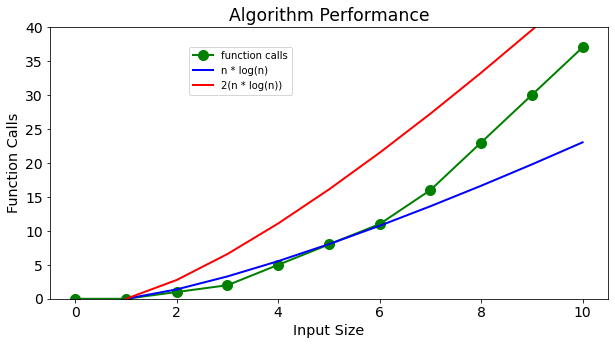

In [30]:
# %matplotlib inline
import matplotlib.pyplot as plt

yvals = calls
xvals = input_size
goal = []
goal2 = []

for i in range(len(xvals)):
    x = i * np.log(i)
    goal.append(x)

for i in range(len(xvals)):
    x = 2 * (i * np.log(i))
    goal2.append(x) 

plt.rcParams['figure.figsize'] = [10,5]
plt.figure()
plt.title("Algorithm Performance", size="xx-large")
plt.ylabel("Function Calls", size="x-large")
plt.xlabel("Input Size", size="x-large")
plt.ylim([0,40]) # y-axis scale

# The "b^-" has meaning - "b" means blue, "^" means triangles (try *, s, o), 
# "-" means draw a line 
plt.plot(xvals, yvals, "go-", markersize=10, linewidth=2, label="function calls")
plt.plot(xvals, goal, "b-", markersize = 10, linewidth = 2, label = "n * log(n)")
plt.plot(xvals, goal2, "r-", markersize = 10, linewidth = 2, label = "2(n * log(n))")
plt.tick_params(axis="both", which="major", labelsize=14)
plt.legend(loc=(0.25,0.75), scatterpoints=1)

**As seen in this graph, my algorithm closely follows the graph of $n * log(n)$ on small input sizes, but begins to tail off for larger input sizes. Although a decent representation, this analysis is not entirely accurate considering we are only taking into account the most expensive operation, which is calls to the function in which the distance calculation is done. In reality, I believe my function executes closer to $O(2(n * log(n)))$ time.**

# Retrospection (10 total)
For this algorithm, I think I could have made improvements on the sorting of points to improve my asymptotic worst-case running time. Also, since I had trouble implementing the algorithm in general I used Python's built-in sort method for simplicity to help with figuring out the algorithm. If time permitted, I planned to implement a merge sort algorithm to sort the points. I also believe I could clean up the code in the brute-force algorithm that calculates the distance between points to make it operate faster, which would be significant since it is the function that is doing most of the work in the algorithm.

# Citations
1:  Lazorenko, Andriy. Closest pair of points in Python (divide and conquer): the quick implementation. (Feb. 9, 2017).
https://medium.com/@andriylazorenko/closest-pair-of-points-in-python-79e2409fc0b2

## INSTRUCTOR-PROVIDED TEST DATA

In [ ]:
# INSTRUCTOR-PROVIDED TEST DATA
# Ensure that your code matches both the input signature and the expected output
# For grading, different test data will be pasted into the input cell and your code cells will be executed
# Be sure that your input and output signatures match the provided sample data
# You should also generate your own test data to fully explore the behavior of your code

# Test #1
POINTS = [(7, 16), (13, 5), (4, 2), (20, 8), (5, 16), (2, 4), (6, 6), (20, 15), (17, 8), (11, 16)]
M = 1  # Number of closest points to return
# Expected output:
# Points (7, 16) and (5, 16), distance = 2.0

#Test #2
POINTS = [(7, 16), (13, 5), (4, 2), (20, 8), (5, 16), (2, 4), (6, 6), (20, 15), (17, 8), (11, 16)]
M = 10  
# Expected output:
# The closest 10 pairs of points are: 
# Points (7, 16) and (5, 16), distance = 2.0
# Points (4, 2) and (2, 4), distance = 2.8284271247461903
# Points (20, 8) and (17, 8), distance = 3.0
# Points (7, 16) and (11, 16), distance = 4.0
# Points (4, 2) and (6, 6), distance = 4.47213595499958
# Points (2, 4) and (6, 6), distance = 4.47213595499958
# Points (13, 5) and (17, 8), distance = 5.0
# Points (5, 16) and (11, 16), distance = 6.0
# Points (20, 8) and (20, 15), distance = 7.0
# Points (13, 5) and (6, 6), distance = 7.0710678118654755

# Test #3
POINTS = [(6, 6), (4, 7), (17, 3), (6, 18), (2, 13), (12, 5), (5, 10), (18, 16), (2, 20), (13, 1)]
M = 5
# Expected output:
# The closest 5 pairs of points are: 
# Points (6, 6) and (4, 7), distance = 2.23606797749979
# Points (4, 7) and (5, 10), distance = 3.1622776601683795
# Points (6, 6) and (5, 10), distance = 4.123105625617661
# Points (12, 5) and (13, 1), distance = 4.123105625617661
# Points (2, 13) and (5, 10), distance = 4.242640687119285
